In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from LowLevelModules.Spectroscopy import Spectrum
from scipy.optimize import curve_fit
from LowLevelModules.GeneralFunctions import get_work_dir, prettify_plot, prettify_2d_plot, voigt_func, voigt_func_2p
import numpy as np
import os

# user input
wdir = r'C:\Users\Raphael\OneDrive - Cornell University\paper figures\fig5\no hBN(same sample as hBN top)'
f = '\spectrum_pillar14_8uW_2V_4c5K_timetrace'
remove_cosmic = False
n_std = 10          # the threshold on how many standard deviations from the median to exclude the data
manual = False       # to remove the cosmic rays manually (no automatic)
idy = np.array([23,53])            # the y-index (time) of the cosmic ray
idx_man = np.array([np.arange(92,98),np.arange(892,897)])        # the x-indices of the cosmic ray


file = wdir + '\\' + f + '.spe'
spect = Spectrum(file)
t_exp = spect.exposure_time
num_file = len(spect.data)
t_trace = np.zeros((num_file, 1340))
_time = np.arange(num_file) * t_exp

for i in range(num_file):
    idx=np.array([])
    single_shot = spect.data[i][0].T
    single_shot = single_shot[:,0] / t_exp
    if remove_cosmic:
        if manual:
            if i in idy:
                idx = np.array(idx_man[np.where(i==idy)[0][0]])
        else:
            idx, = np.where(abs(single_shot - np.median(single_shot)) > n_std * np.std(single_shot))
        if idx.size != 0:
            print("y-index: " + str(i))
            print("x-index: " + str(idx))
            idx_prev = idx[0] - 1
            idx_next = idx[-1] + 1
            slope = (single_shot[idx_next] - single_shot[idx_prev]) / (spect.x[idx_next] - spect.x[idx_prev])
            origin_crossing = single_shot[idx_prev] - slope * spect.x[idx_prev]
            cts_replace = slope * spect.x[idx] + origin_crossing
            y_noise = 0.1 * np.std(single_shot) * np.random.normal(size=cts_replace.size)
            single_shot[idx] = cts_replace + y_noise
    t_trace[i,:] = single_shot

(700.0, 820.0)

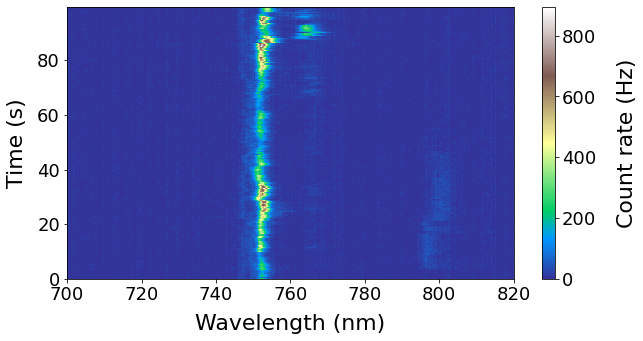

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
p2 = ax.pcolor(spect.x, _time, t_trace, cmap='jet', vmin=0, vmax=np.max(t_trace)) #norm=LogNorm(vmin=0, vmax=np.max(z))) #
cb2 = fig.colorbar(p2)
prettify_2d_plot(ax, cb2, 'Wavelength (nm)', 'Time (s)', 'Count rate (Hz)')
plt.xlim(700, 820)

In [3]:
# fig.savefig(wdir + '\\' + f + '.png', format='png', bbox_inches='tight')
fig.savefig(wdir + '\\' + f + '.eps', format='eps', bbox_inches='tight')
# np.savetxt(wdir + '\\' + f + ' X.txt', spect.x)
# np.savetxt(wdir + '\\' + f + ' Y.txt', _time)
# np.savetxt(wdir + '\\' + f + ' Z.txt', t_trace)

(720, 800)

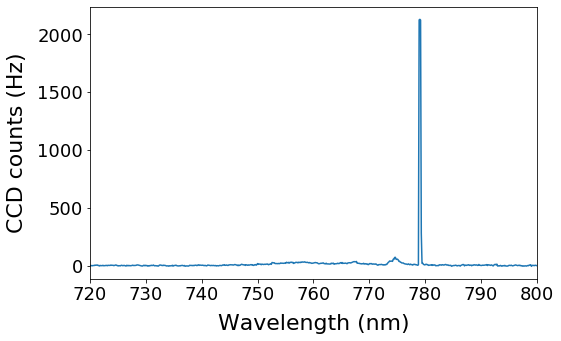

In [203]:
#single_shot_num = 16
#fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
#ax2.plot(spect.x, t_trace[single_shot_num,:], '-', label='single shot')
#ax2.plot(spect.x, np.mean(t_trace, axis=0), '-', label='averaged')
#prettify_plot(ax2, "Wavelength (nm)", "CCD counts (Hz)")
#plt.xlim(720, 800)
#ax2.legend(fontsize=12, frameon=False)

single_shot_num = 53
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
ax2.plot(spect.x, t_trace[single_shot_num,:], '-')
prettify_plot(ax2, "Wavelength (nm)", "CCD counts (Hz)")
plt.xlim(720, 800)

In [16]:
#fig2.savefig(wdir + '\\' + f + '_singleVSaverage.png', format='png', bbox_inches='tight')
fig2.savefig(wdir + '\\' + f + '_singleshot.png', format='png', bbox_inches='tight')